In [75]:
import pandas as pd
import numpy as np

In [2]:
credito = pd.read_csv('./Cartera29122022.csv', encoding='ISO-8859-1')
credito.head(3)

,SUC,SOCIO,NOMBRE_DEL_SOCIO,F. NACIMIENTO,SEXO,NOMBRE_ESTADO,NOMBRE_MUNICIPIO,NOMBRE_COLONIA,NOMBRE_LOCALIDAD,POBLACION,...,C VENCIDO,SCAPITAL,D. VEN,D X VEN,INTERES,MORA,DESCRIPCION PRODUCTO,NOMBRE PROMOTOR,CRED,DESTINO
0,1,2,ISABEL CRUZ HERNANDEZ,08/07/1958,F,MORELOS,CUERNAVACA,CUERNAVACA,CUERNAVACA,"338,650",...,0.00,"45,833.33",0,12,343.74,0.00,CREDITO COLABORADORES,TEMPORAL,312,OTROS
1,1,14,CLAUDIA GONZALEZ CARDENAS,29/04/1978,F,DISTRITO FEDERAL,BENITO JUAREZ,DEL VALLE SUR,DEL VALLE SUR,"2,622",...,0.00,"30,793.63",0,47,569.68,0.00,CREDITO COLABORADORES,TEMPORAL,302,OTROS
2,1,19,GABRIELA BAUTISTA HERNANDEZ,08/03/1986,F,DISTRITO FEDERAL,LA MAGDALENA CONTRERAS,EL ROSAL,EL ROSAL,"1,710",...,0.00,"11,235.35",0,15,5.61,0.00,CREDITO COLABORADORES,TEMPORAL,301,GASTOS MEDICOS


In [3]:
credito.columns

Index(['SUC', 'SOCIO', 'NOMBRE_DEL_SOCIO', 'F. NACIMIENTO', 'SEXO',
       'NOMBRE_ESTADO', 'NOMBRE_MUNICIPIO', 'NOMBRE_COLONIA',
       'NOMBRE_LOCALIDAD', 'POBLACION', 'F. EMISION', 'MONTO', 'F. VENCE',
       'T. INT', 'N. PAG', 'F. PAG', 'C VIGENTE', 'C VENCIDO', 'SCAPITAL',
       'D. VEN', 'D X VEN', 'INTERES', 'MORA', 'DESCRIPCION PRODUCTO',
       'NOMBRE PROMOTOR', 'CRED', 'DESTINO'],
      dtype='object')

In [4]:
cols_cred=['SUC', 'SOCIO', 'CRED', 'DESCRIPCION PRODUCTO','SCAPITAL']

In [5]:
df_cred= credito[cols_cred]
df_cred

,SUC,SOCIO,CRED,DESCRIPCION PRODUCTO,SCAPITAL
0,1,2,312,CREDITO COLABORADORES,"45,833.33"
1,1,14,302,CREDITO COLABORADORES,"30,793.63"
2,1,19,301,CREDITO COLABORADORES,"11,235.35"
3,1,27,175,CREDITO COLABORADORES,"9,160.03"
4,1,28,95,CREDITO COLABORADORES,"10,182.18"
...,...,...,...,...,...
10106,205,"2,849","2,590",CREDITO MEJORA LA CASA,"30,000.00"
10107,205,"2,851","2,592",CREDITO NEGOCIO,"22,000.00"
10108,205,"2,853","2,594",CREDITO NEGOCIO,"30,000.00"
10109,205,"2,854","2,596",CREDITO NEGOCIO,"30,000.00"


In [6]:
captacion= pd.read_csv('./Captacion29122022.csv', encoding='ISO-8859-1')
captacion.head(3)

,SUC,SOCIO,CUENTA,Producto,F. Inicio,F. Venc,% Int,SALDO
0,1,1,2,AHORRO CORRIENTE,19/01/18,NaN,5.0,556.87
1,1,2,2,AHORRO CORRIENTE,13/03/18,NaN,5.0,371.35
2,1,3,2,AHORRO CORRIENTE,08/11/18,NaN,5.0,404.06


In [7]:
cols_capt=['SUC', 'SOCIO', 'CUENTA', 'Producto','SALDO']
df_capt =captacion[cols_capt]
df_capt

,SUC,SOCIO,CUENTA,Producto,SALDO
0,1,1,2,AHORRO CORRIENTE,556.87
1,1,2,2,AHORRO CORRIENTE,371.35
2,1,3,2,AHORRO CORRIENTE,404.06
3,1,4,2,AHORRO CORRIENTE,51.25
4,1,6,2,AHORRO CORRIENTE,"5,782.02"
...,...,...,...,...,...
27404,204,"1,224",580,DPF A 360 Dï¿½as,"207,358.21"
27405,204,"1,285",622,DPF A 91 Dï¿½as,"30,441.04"
27406,205,"1,172",29,DPF A 181 Dï¿½as,"4,277.29"
27407,205,"2,134",23,DPF A 360 Dï¿½as,"8,932.64"


In [8]:
result = pd.merge(df_capt, df_cred, how="outer", on=["SUC", "SOCIO"])
result

,SUC,SOCIO,CUENTA,Producto,SALDO,CRED,DESCRIPCION PRODUCTO,SCAPITAL
0,1,1,2,AHORRO CORRIENTE,556.87,NaN,NaN,NaN
1,1,2,2,AHORRO CORRIENTE,371.35,312,CREDITO COLABORADORES,"45,833.33"
2,1,3,2,AHORRO CORRIENTE,404.06,NaN,NaN,NaN
3,1,4,2,AHORRO CORRIENTE,51.25,NaN,NaN,NaN
4,1,6,2,AHORRO CORRIENTE,"5,782.02",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
27430,204,"1,017",651,DPF A 60 Dï¿½as,"13,985.06",NaN,NaN,NaN
27431,204,"1,036",616,DPF A 180 Dï¿½as,"35,005.90",NaN,NaN,NaN
27432,204,"1,224",580,DPF A 360 Dï¿½as,"207,358.21",NaN,NaN,NaN
27433,4,"1,891",NaN,NaN,NaN,"3,743",CREDITO MEJORA LA CASA,"22,426.38"


In [9]:
result.to_csv('./cred_capt.csv', index=False)

In [10]:
cols_capt=['SUC', 'SOCIO', 'Producto','SALDO']
df_capt =captacion[cols_capt]
df_capt

,SUC,SOCIO,Producto,SALDO
0,1,1,AHORRO CORRIENTE,556.87
1,1,2,AHORRO CORRIENTE,371.35
2,1,3,AHORRO CORRIENTE,404.06
3,1,4,AHORRO CORRIENTE,51.25
4,1,6,AHORRO CORRIENTE,"5,782.02"
...,...,...,...,...
27404,204,"1,224",DPF A 360 Dï¿½as,"207,358.21"
27405,204,"1,285",DPF A 91 Dï¿½as,"30,441.04"
27406,205,"1,172",DPF A 181 Dï¿½as,"4,277.29"
27407,205,"2,134",DPF A 360 Dï¿½as,"8,932.64"


In [11]:
df_capt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27409 entries, 0 to 27408
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SUC       27409 non-null  int64 
 1   SOCIO     27409 non-null  object
 2   Producto  27409 non-null  object
 3   SALDO     27409 non-null  object
dtypes: int64(1), object(3)
memory usage: 856.7+ KB


In [12]:
df_capt['SALDOF']= df_capt['SALDO'].str.replace(',', '').astype(float)

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\56952179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capt['SALDOF']= df_capt['SALDO'].str.replace(',', '').astype(float)


In [13]:
df_capt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27409 entries, 0 to 27408
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SUC       27409 non-null  int64  
 1   SOCIO     27409 non-null  object 
 2   Producto  27409 non-null  object 
 3   SALDO     27409 non-null  object 
 4   SALDOF    27409 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


In [14]:
capt_grp=df_capt.groupby(['SUC', 'SOCIO'])
saldo_capt=capt_grp['SALDOF'].sum()
saldo_capt

SUC  SOCIO
1    1        556.87
     10       890.78
     104       40.66
     105       78.63
     106       29.39
               ...  
205  981        0.00
     983       39.54
     985        0.65
     991      572.40
     995        1.83
Name: SALDOF, Length: 21908, dtype: float64

In [15]:
saldo_capt.info()

<class 'pandas.core.series.Series'>
MultiIndex: 21908 entries, (1, '1') to (205, '995')
Series name: SALDOF
Non-Null Count  Dtype  
--------------  -----  
21908 non-null  float64
dtypes: float64(1)
memory usage: 266.7+ KB


In [16]:
saldo_capt.to_csv('./saldo_capt.csv')

In [17]:
cols_cred=['SUC', 'SOCIO','SCAPITAL']

In [18]:
df_cred= credito[cols_cred]
df_cred

,SUC,SOCIO,SCAPITAL
0,1,2,"45,833.33"
1,1,14,"30,793.63"
2,1,19,"11,235.35"
3,1,27,"9,160.03"
4,1,28,"10,182.18"
...,...,...,...
10106,205,"2,849","30,000.00"
10107,205,"2,851","22,000.00"
10108,205,"2,853","30,000.00"
10109,205,"2,854","30,000.00"


In [19]:
result = pd.merge(saldo_capt, df_cred, how="outer", on=["SUC", "SOCIO"])
result

,SUC,SOCIO,SALDOF,SCAPITAL
0,1,1,556.87,NaN
1,1,10,890.78,NaN
2,1,104,40.66,NaN
3,1,105,78.63,NaN
4,1,106,29.39,NaN
...,...,...,...,...
21916,205,985,0.65,"23,243.48"
21917,205,991,572.40,NaN
21918,205,995,1.83,NaN
21919,4,"1,891",NaN,"22,426.38"


In [20]:
result.to_csv('./cred_capt2.csv')

In [22]:
credito['MORA']= credito['MORA'].str.replace(',', '').astype(float)

In [24]:
credito['SCAPITAL'] = credito['SCAPITAL'].str.replace(',', '').astype(float)

In [25]:
credito.pivot_table(index=['SUC', 'CRED'])

C:\Users\Usuario Innova\AppData\Local\Temp\ipykernel_14364\1686147960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  credito.pivot_table(index=['SUC', 'CRED'])


D X VEN  D. VEN  F. PAG  MORA  N. PAG   SCAPITAL  T. INT
SUC CRED                                                           
1   175         14       0      15   0.0      24    9160.03      18
    176        110       0     360   0.0       1   15000.00      30
    177        113       0     360   0.0       1   20000.00      30
    178        116       0     360   0.0       1   45000.00      30
    179        116       0     360   0.0       1   45000.00      30
...            ...     ...     ...   ...     ...        ...     ...
205 2,600       26       0      30   0.0      12   20000.00      42
    2,601      362       0     360   0.0       1   30000.00      30
    2,602      362       0     360   0.0       1  220000.00      30
    2,603      362       0     360   0.0       1  220000.00      30
    2,604       30       0      30   0.0      12   14000.00      42

[10111 rows x 7 columns]

In [41]:
mora_sum= credito.pivot_table(index=['SUC'], values='MORA', aggfunc=['sum'], sort=True )
mora_sum

,sum
,MORA
SUC,
1,154633.33
2,101036.21
3,26276.52
4,154996.54
5,2230371.72
6,102962.93
7,129593.13
8,217923.03


<Axes: ylabel='SUC'>

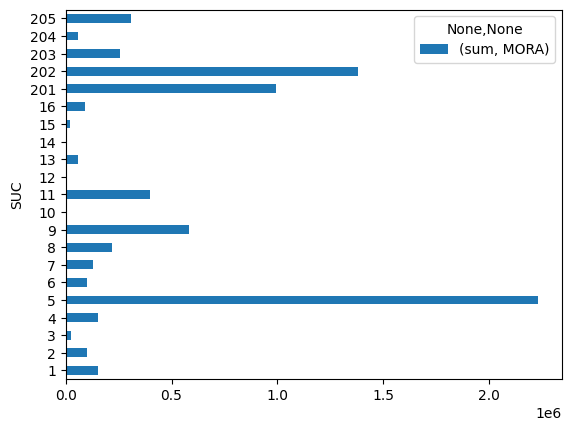

In [42]:
mora_sum.plot(kind='barh')

In [58]:
mora_count= credito.pivot_table(index=['SUC'], values='MORA', aggfunc=['count'], sort=True, margins=True )
mora_count

,count
,MORA
SUC,
1,126
2,746
3,327
4,1017
5,528
6,715
7,896
8,976


In [59]:
credito.shape

(10111, 27)

<Axes: ylabel='SUC'>

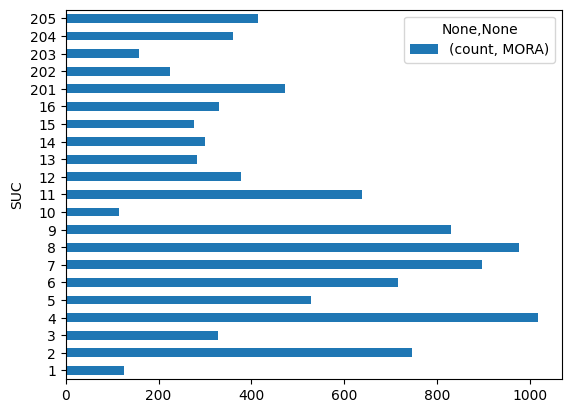

In [54]:
mora_count.plot(kind='barh')

In [57]:
mora_count.query('SUC <11')

,count
,MORA
SUC,
1,126
2,746
3,327
4,1017
5,528
6,715
7,896
8,976


In [61]:
df = pd.read_excel("./sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [67]:
df.pivot_table(index=['Manager', 'Rep'], values=['Quantity', 'Price'], aggfunc=['sum', 'count', 'mean' ])

sum          count                   mean  \
                              Price Quantity Price Quantity         Price   
Manager       Rep                                                           
Debra Henley  Craig Booker    80000        5     4        4  20000.000000   
              Daniel Hilton  115000        5     3        3  38333.333333   
              John Smith      40000        3     2        2  20000.000000   
Fred Anderson Cedric Moss    110000        5     4        4  27500.000000   
              Wendy Yule     177000       12     4        4  44250.000000   

                                       
                             Quantity  
Manager       Rep                      
Debra Henley  Craig Booker   1.250000  
              Daniel Hilton  1.666667  
              John Smith     1.500000  
Fred Anderson Cedric Moss    1.250000  
              Wendy Yule     3.000000

In [69]:
df.pivot_table(index=['Manager', 'Rep'], values=['Quantity', 'Price'], aggfunc=['sum'])

sum         
                              Price Quantity
Manager       Rep                           
Debra Henley  Craig Booker    80000        5
              Daniel Hilton  115000        5
              John Smith      40000        3
Fred Anderson Cedric Moss    110000        5
              Wendy Yule     177000       12

In [73]:
df.pivot_table(index=['Rep'], columns='Manager', values=['Quantity', 'Price'], aggfunc=['sum'])

sum                                         
                     Price                   Quantity              
Manager       Debra Henley Fred Anderson Debra Henley Fred Anderson
Rep                                                                
Cedric Moss            NaN      110000.0          NaN           5.0
Craig Booker       80000.0           NaN          5.0           NaN
Daniel Hilton     115000.0           NaN          5.0           NaN
John Smith         40000.0           NaN          3.0           NaN
Wendy Yule             NaN      177000.0          NaN          12.0

In [76]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

<Axes: ylabel='Manager,Rep'>

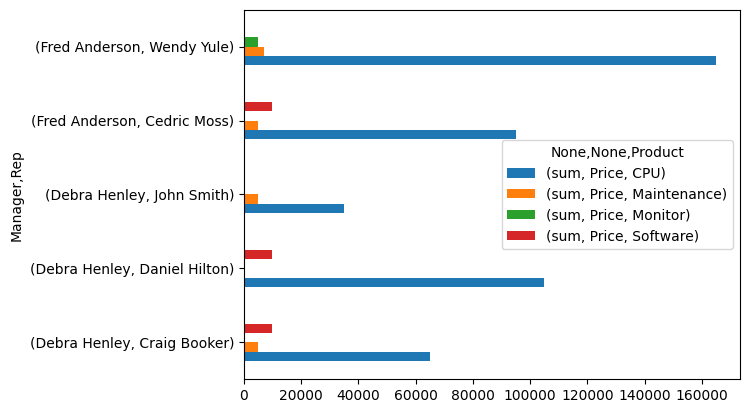

In [78]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0).plot(kind='barh')

In [79]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

In [80]:
pd.pivot_table(df,index=["Manager","Status"],values=["Price"],
               aggfunc=[np.sum],fill_value=0,margins=True)

sum
                          Price
Manager       Status           
Debra Henley  declined    70000
              pending     50000
              presented   50000
              won         65000
Fred Anderson declined    65000
              pending      5000
              presented   45000
              won        172000
All                      522000

In [81]:
table = pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],
               aggfunc={"Quantity":len,"Price":[np.sum,np.mean]},fill_value=0)
table

Price                                       \
                          mean                                  sum   
Product                    CPU Maintenance Monitor Software     CPU   
Manager       Status                                                  
Debra Henley  declined   35000           0       0        0   70000   
              pending    40000        5000       0        0   40000   
              presented  30000           0       0    10000   30000   
              won        65000           0       0        0   65000   
Fred Anderson declined   65000           0       0        0   65000   
              pending        0        5000       0        0       0   
              presented  30000           0    5000    10000   30000   
              won        82500        7000       0        0  165000   

                                                     Quantity              \
                                                          len               
Product                 Maintenance Monitor Software      CPU Maintenance   
Manager       Status                                                        
Debra Henley  declined            0       0        0        2           0   
              pending         10000       0        0        1           2   
              presented           0       0    20000        1           0   
              won                 0       0        0        1           0   
Fred Anderson declined            0       0        0        1           0   
              pending          5000       0        0        0           1   
              presented           0    5000    10000        1           0   
              won              7000       0        0        2           1   

                                          
                                          
Product                 Monitor Software  
Manager       Status                      
Debra Henley  declined        0        0  
              pending         0        0  
              presented       0        2  
              won             0        0  
Fred Anderson declined        0        0  
              pending         0        0  
              presented       1        1  
              won             0        0

In [82]:
table.query('Manager == ["Debra Henley"]')

Price                                                  \
                         mean                                 sum               
Product                   CPU Maintenance Monitor Software    CPU Maintenance   
Manager      Status                                                             
Debra Henley declined   35000           0       0        0  70000           0   
             pending    40000        5000       0        0  40000       10000   
             presented  30000           0       0    10000  30000           0   
             won        65000           0       0        0  65000           0   

                                        Quantity                               
                                             len                               
Product                Monitor Software      CPU Maintenance Monitor Software  
Manager      Status                                                            
Debra Henley declined        0        0        2           0       0        0  
             pending         0        0        1           2       0        0  
             presented       0    20000        1           0       0        2  
             won             0        0        1           0       0        0

In [83]:
table.query('Status == ["pending","won"]')

Price                                                   \
                        mean                                  sum               
Product                  CPU Maintenance Monitor Software     CPU Maintenance   
Manager       Status                                                            
Debra Henley  pending  40000        5000       0        0   40000       10000   
              won      65000           0       0        0   65000           0   
Fred Anderson pending      0        5000       0        0       0        5000   
              won      82500        7000       0        0  165000        7000   

                                       Quantity                               
                                            len                               
Product               Monitor Software      CPU Maintenance Monitor Software  
Manager       Status                                                          
Debra Henley  pending       0        0        1           2       0        0  
              won           0        0        1           0       0        0  
Fred Anderson pending       0        0        0           1       0        0  
              won           0        0        2           1       0        0